<a href="https://colab.research.google.com/github/Pbarbecho/Curso_Python/blob/main/Diet_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diet Problem

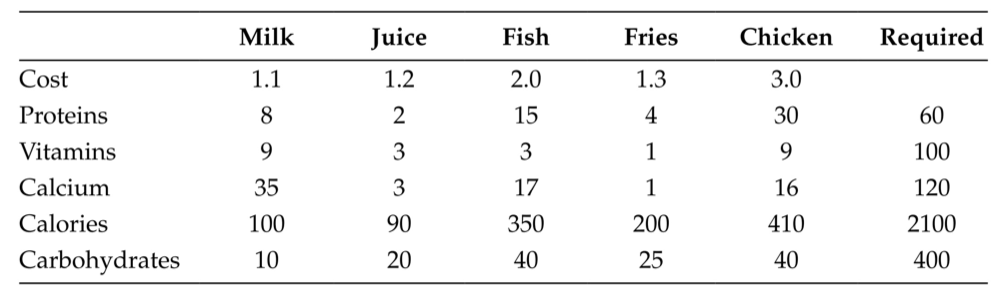

# 1. Importar Librería Pyomo / Solver

In [ ]:
!pip install pyomo # framework
!apt-get install glpk-utils # solver
from pyomo.environ import *

# 2. Instantiate el Objeto(model)

In [ ]:
# Modelo del tipo Concreto: elementos estáticos
model = ConcreteModel()

# 3. Variables de Decisión

In [ ]:
# Definición del espacio del vector x (variables de decisión)
variables_decision = RangeSet(0,4)

# Definición del vector x de variables de decisión
model.x = Var(variables_decision , domain=NonNegativeIntegers)

# 4. Función Objetivo (exp/rule)

In [ ]:
# Definición de la F.O. usando una expresión (expr-based)
model.func_objetivo = Objective(expr = 1.1*model.x[0] + 2.1*model.x[1])

In [ ]:
# Definición de la F.O. usando una función (rule)
# z = c^T x

# Vector de coeficientes de la F.O.
c = [1.1 , 2.1 , 3.1 , 4.1 , 5.1]

#función (rule)
def function_rule(model):
  return sum(c[i] * model.x[i] for i in range(len(model.x)))

# definición de la F.O. (rule-based)
model.func_objetivo = Objective(rule=function_rule , sense=minimize)

In [ ]:
# Visualizar la F.O.
str(model.func_objetivo.expr)

# 5. Restricciones (exp/rule)

In [ ]:
# Definir una lista restricciones (expr-based)
model.restricciones = ConstraintList()

In [ ]:
# Agregar m restricciones
model.restricciones.add(1*model.x[0] + 2*model.x[1] + 3*model.x[2] >= 10)
model.restricciones.add(10*model.x[0] + 20*model.x[1] + 30*model.x[2] >= 100)

In [ ]:
# Restricciones Notacion matricial
# A x >= b
A = [ [1, 2 , 3 ,4 , 5] , [6 , 7 , 8 , 9 , 5] , [1, 2 , 3 ,4 , 5] , [1, 2 , 3 ,4 , 5] , [1, 2 , 3 ,4 , 5]]
b = [1 , 2 , 3 , 4 , 5]

In [ ]:
# Definir # restricciones (m)
model.RESTR = RangeSet(len(A))

In [ ]:
# Definir la función restricción (rule-based)
def restriccion_rule(model, j):
  return sum(A[j-1][i] * model.x[i] for i in range(len(model.x))) >= b[j-1]

In [ ]:
# Crear las restricciones del modelo (rule-based)
model.restricciones = Constraint(model.RESTR , rule=restriccion_rule) # Constrain(m , rule)

In [ ]:
# Visualizar restricciones creadas
str(model.restricciones[5].expr) # muestra restriccion [i]

# 6. Solver (Run)

In [ ]:
!glpsol --version # verifica la existencia de glpk y su ejecutable glpsol

In [ ]:
solver = SolverFactory('glpk') # Selecciona el método de solucion
result = solver.solve(model) # run opt model

In [ ]:
# results summary
model.pprint()

# print solutions for desicion variables
for i in model.x:
  print(model.x[i].value)